In [45]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


In [46]:
df = pd.read_csv('/Users/ethan/Desktop/Ethan/Python/ML/framework/notebooks/processed_train.csv')
test_df = pd.read_csv('/Users/ethan/Desktop/Ethan/Python/ML/framework/notebooks/processed_test.csv')
y = df['Transported']
x = df.drop(['Transported', 'PassengerId'], axis = 1)
col_names = x.columns
test_df

,PassengerId,RoomService,Spa,VRDeck,VIP_0,VIP_1,VIP_2,Destination_0,Destination_1,Destination_2,...,HomePlanet_3,CabinPrefix_0,CabinPrefix_1,CabinPrefix_2,CabinPrefix_3,CabinPrefix_4,CabinPrefix_5,CabinPrefix_6,CabinPrefix_7,CabinPrefix_8
0,0013_01,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0018_01,0.0,2823.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0019_01,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0021_01,0.0,181.0,585.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0023_01,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4273,9269_01,0.0,10.0,144.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4274,9271_01,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4275,9273_01,0.0,0.0,523.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [47]:
#this converts it from True and false to one and zero
Y = [1 if i else 0 for i in y]

In [48]:
model = RandomForestRegressor()
model.fit(x, Y)

RandomForestRegressor()

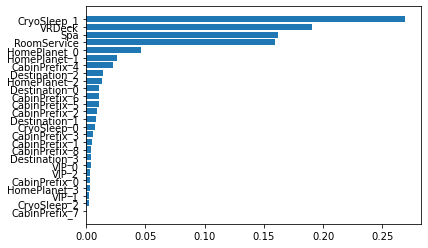

In [49]:
importances = model.feature_importances_
idxs = np.argsort(importances)
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
plt.show()

In [50]:
#Figure above sugests that some of the features are of little to no importance so i will remove them:
importances

array([1.59223507e-01, 1.62005930e-01, 1.90748316e-01, 4.02149601e-03,
       2.73626518e-03, 3.48037378e-03, 1.09437997e-02, 8.65493240e-03,
       1.45717395e-02, 4.05390923e-03, 7.66296905e-03, 2.69063032e-01,
       2.47196692e-03, 4.61352406e-02, 2.60842622e-02, 1.37540714e-02,
       2.83394334e-03, 3.30763706e-03, 4.65896155e-03, 9.46464746e-03,
       5.53247752e-03, 2.30072018e-02, 1.06385034e-02, 1.06836593e-02,
       5.52979758e-06, 4.25562852e-03])

In [51]:
[col_names[i] for i in idxs]

['CabinPrefix_7',
 'CryoSleep_2',
 'VIP_1',
 'HomePlanet_3',
 'CabinPrefix_0',
 'VIP_2',
 'VIP_0',
 'Destination_3',
 'CabinPrefix_8',
 'CabinPrefix_1',
 'CabinPrefix_3',
 'CryoSleep_0',
 'Destination_1',
 'CabinPrefix_2',
 'CabinPrefix_5',
 'CabinPrefix_6',
 'Destination_0',
 'HomePlanet_2',
 'Destination_2',
 'CabinPrefix_4',
 'HomePlanet_1',
 'HomePlanet_0',
 'RoomService',
 'Spa',
 'VRDeck',
 'CryoSleep_1']

In [52]:
#put into func:

#to demonstrate how to use sklearn to only select the most important models:
from sklearn.feature_selection import SelectFromModel

#we already have x, y, col_names:
model = RandomForestRegressor()

#slect from model all params over a ceratn threshold
sfm = SelectFromModel(estimator=model, threshold=0.04)
x_transformed = sfm.fit_transform(x, y)

#see what we selcted:
support = sfm.get_support()

#support is just an array of true and false so to see what has been selcted:
transformed_col_names = [x for x, y in zip(col_names, support) if y == True]
transformed_col_names

['RoomService', 'Spa', 'VRDeck', 'CryoSleep_1', 'HomePlanet_0']

In [53]:
#changing the test data
test_df = test_df[transformed_col_names + ['PassengerId']]
test_df

,RoomService,Spa,VRDeck,CryoSleep_1,HomePlanet_0,PassengerId
0,0.0,0.0,0.0,1.0,1.0,0013_01
1,0.0,2823.0,0.0,0.0,1.0,0018_01
2,0.0,0.0,0.0,1.0,0.0,0019_01
3,0.0,181.0,585.0,0.0,0.0,0021_01
4,10.0,0.0,0.0,0.0,1.0,0023_01
...,...,...,...,...,...,...
4272,0.0,0.0,0.0,1.0,1.0,9266_02
4273,0.0,10.0,144.0,0.0,1.0,9269_01
4274,0.0,0.0,0.0,1.0,0.0,9271_01
4275,0.0,0.0,523.0,0.0,0.0,9273_01


In [54]:
new_data = pd.DataFrame(x_transformed, columns=transformed_col_names)
new_data['Transported'] = Y

In [55]:

new_data


,RoomService,Spa,VRDeck,CryoSleep_1,HomePlanet_0,Transported
0,0.0,0.0,0.0,0.0,0.0,0
1,109.0,549.0,44.0,0.0,1.0,1
2,43.0,6715.0,49.0,0.0,0.0,0
3,0.0,3329.0,193.0,0.0,0.0,0
4,303.0,565.0,2.0,0.0,1.0,1
...,...,...,...,...,...,...
8688,0.0,1643.0,74.0,0.0,0.0,0
8689,0.0,0.0,0.0,1.0,1.0,0
8690,0.0,1.0,0.0,0.0,1.0,1
8691,0.0,353.0,3235.0,0.0,0.0,0


In [56]:
#I am getting the data from the notebooks file then passing it to this notebook to then get the most important features and put back into the training loop.
new_data.to_csv(
    '/Users/ethan/Desktop/Ethan/Python/ML/framework/input/spaceship-titanic/processed_train.csv', index=False
    )
test_df.to_csv(
    '/Users/ethan/Desktop/Ethan/Python/ML/framework/input/spaceship-titanic/processed_test.csv', index=False
   )

In [57]:
#This is to override the changes and see if it makes any more imporvements:
#usally I will not run this box.
#at the moment the prev scripts significantly reduct the traininng time and also increase the accuracy so i think I will keep them
#especially with the svc


#df = pd.read_csv('/Users/ethan/Desktop/Ethan/Python/ML/framework/notebooks/processed_train.csv')
#df.to_csv(
#    '/Users/ethan/Desktop/Ethan/Python/ML/framework/input/spaceship-titanic/processed_train.csv', index=False
#    )